In [1]:
import os
import glob
import numpy as np
import skimage.external.tifffile as skext

In [4]:
fnames_all=[]
for file in glob.glob('D:/temp/Complex/F10/*.tiff', recursive=False):
    if file.endswith(".tiff"):
        fnames_all.append(file)
#FishNames=list(set([s.rpartition('2p_complex_f')[2].rpartition('proper')[0] for s in fnames_all]))
FishNames=list(set([s.rpartition('\\')[2].rpartition('\\')[0] for s in fnames_all]))
FishNames

['']

In [6]:
fnames_all

['D:/temp/Complex/F10\\F10_100um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_100um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_100um_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_3_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_4_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_mean.tiff',
 'D:/temp/Complex/F10\\F10_20um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10

In [5]:
FishNames=list(set([s.rpartition('\\')[0].rpartition('\\')[2].rpartition('_c')[0] for s in fnames_all]))
FishNames

['']

In [82]:
FishNames=['Fish4', 'Fish5', 'Fish6','Fish7']

In [7]:
FishNames=['F10']

In [8]:
matches = [s for s in fnames_all if FishNames[0] in str(s) and '_mean.tiff' in str(s)]
matches

['D:/temp/Complex/F10\\F10_100um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_100um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_100um_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_2_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_3_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_4_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_mean.tiff',
 'D:/temp/Complex/F10\\F10_20um_1_mean.tiff',
 'D:/temp/Complex/F10\\F10

In [11]:
i=0
matches = [s for s in fnames_all if FishNames[i] in str(s)]
matches = [s for s in matches if 'm_mean.tiff' in s]
matches

['D:/temp/Complex/F10\\F10_100um_mean.tiff',
 'D:/temp/Complex/F10\\F10_120um_mean.tiff',
 'D:/temp/Complex/F10\\F10_140um_mean.tiff',
 'D:/temp/Complex/F10\\F10_160um_mean.tiff',
 'D:/temp/Complex/F10\\F10_180um_mean.tiff',
 'D:/temp/Complex/F10\\F10_200um_mean.tiff',
 'D:/temp/Complex/F10\\F10_20um_mean.tiff',
 'D:/temp/Complex/F10\\F10_220um_mean.tiff',
 'D:/temp/Complex/F10\\F10_240um_mean.tiff',
 'D:/temp/Complex/F10\\F10_280um_mean.tiff',
 'D:/temp/Complex/F10\\F10_40um_mean.tiff',
 'D:/temp/Complex/F10\\F10_60um_mean.tiff',
 'D:/temp/Complex/F10\\F10_80um_mean.tiff']

In [80]:
image_name.partition('\\')[2].partition('_')[2].rpartition('um')[0]

'100'

In [15]:
z_max=280
frames=[]
for i in range(0,len(FishNames)):
    for j in range(0,3):
        matches = [s for s in fnames_all if FishNames[i] in str(s)]
        if j==0:
            matches = [s for s in matches if 'm_mean.tiff' in s]
        else:
            matches = [s for s in matches if '_'+str(j)+'_mean.tiff' in s]        
        dims=np.shape(skext.imread(matches[0]))
        z_max=np.max([int(image_name.partition('\\')[2].partition('_')[2].rpartition('um')[0]) for image_name in matches])
        #z_max=np.max([int(image_name.partition('_complex_')[2].rpartition('um')[0]) for image_name in matches])
        #frames=np.zeros((int((z_max-12376)/20)+1,dims[0],dims[1]), dtype='uint16')  
        frames=np.zeros((int(z_max/20)+1,dims[0],dims[1]), dtype='uint16')  
        for image_name in matches:        
            slice_nb=int(image_name.partition('\\')[2].partition('_')[2].rpartition('um')[0])        
            #slice_nb=int(image_name.partition('_complex_')[2].rpartition('um')[0])       
            frame = skext.imread(image_name)
            #frame = frame.mean(axis=0)
            #frames[(int(((slice_nb-12376)/20))),:,:] = frame
            frames[(int((slice_nb/20))),:,:] = frame
        skext.imsave('D:temp/hs_complex'+FishNames[i]+'_'+str(j)+'.tif',frames)

In [26]:
frame = np.zeros((2500,1080,1280))
frame.shape

(2500, 1080, 1280)

In [31]:
matches

['D:/Pictures/processed/Flow/Complex_final\\2p_complex_f1proper_0um__1_mean.tiff',
 'D:/Pictures/processed/Flow/Complex_final\\2p_complex_f1proper_100um__1_mean.tiff',
 'D:/Pictures/processed/Flow/Complex_final\\2p_complex_f1proper_20um__1_mean.tiff',
 'D:/Pictures/processed/Flow/Complex_final\\2p_complex_f1proper_60um__1_mean.tiff',
 'D:/Pictures/processed/Flow/Complex_final\\2p_complex_f1proper_80um__1_mean.tiff']

In [17]:
z_limit=np.max([int(image_name.partition('_complex_')[2].rpartition('um')[0]) for image_name in matches])
frames=np.zeros((int(z_max/20)+1,dims[0],dims[1]), dtype='uint16')    

ValueError: invalid literal for int() with base 10: '40um_1\\Fish7_complex_40'

In [29]:
frames.shape

(6, 540, 640)

In [13]:
z_max=280
frames=[]
for i in range(0,len(FishNames)):
    matches = [s for s in fnames_all if FishNames[i] and '__2_mean.tiff' in str(s)]
    dims=np.shape(skext.imread(matches[0]))
    z_max=np.max([int(image_name.partition('f1proper_')[2].rpartition('um')[0]) for image_name in matches])
    frames=np.zeros((int(z_max/20)+1,dims[0],dims[1]), dtype='uint16')    
    for image_name in matches:        
        slice_nb=int(image_name.partition('f1proper_')[2].rpartition('um')[0])        
        frame = skext.imread(image_name)
        #frame = frame.mean(axis=0)
        frames[(int((slice_nb/20))),:,:] = frame
    skext.imsave('D:temp/hs_complex'+FishNames[i]+'_2.tif',frames)

IndexError: list index out of range

TypeError: Invalid dimensions for image data

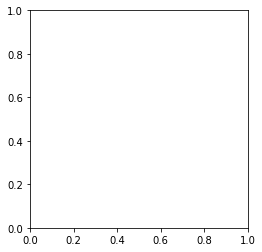

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(frame)

In [22]:
image_name

'D:/Pictures/processed/Flow/Complex_final\\2p_complex_f1proper_80um__mean.tiff'

In [15]:
z_max=280
#zmax=np.max([int(image_name.partition('_complex_')[2].rpartition('um')[0]) for image_name in fnames_all])
frames=[]
for i in range(0,len(FishNames)):
#for i in range(2,3):
    matches = [s for s in fnames_all if FishNames[i] in str(s)]
    dims=np.shape(skext.imread(matches[1]))
    z_limit=np.max([int(image_name.partition('_complex_')[2].rpartition('um')[0]) for image_name in matches])
    frames=np.zeros((int(z_max/20)+1,dims[0],dims[1]), dtype='uint16')    
    for image_name in matches:
        #slice_nb=int(image_name.partition('O_')[2].partition('_')[0])-1
        slice_nb=int(image_name.partition('_complex_')[2].rpartition('um')[0])
        #For Fish7b 
        #slice_nb=slice_nb-12356
        frame = skext.imread(image_name)
        if frame.shape[0]>frames.shape[1]:
            if frame.shape[1]>frames.shape[2]:
                frames=np.pad(frames,((0,0),(0,abs(frames.shape[1]-frame.shape[0])),(0,abs(frames.shape[2]-frame.shape[1]))),'constant')
            elif frame.shape[1]<frames.shape[2]:
                frames=np.pad(frames,((0,0),(0,abs(frames.shape[1]-frame.shape[0])),(0,0)),'constant')
                frame=np.pad(frame,((0,0),(0,abs(frames.shape[2]-frame.shape[1]))),'constant')
            else:
                frames=np.pad(frames,((0,0),(0,abs(frames.shape[1]-frame.shape[0])),(0,0)),'constant')
        elif frame.shape[0]<frames.shape[1]:
            if frame.shape[1]<frames.shape[2]:
                frame=np.pad(frame,((0,abs(frames.shape[1]-frame.shape[0])),(0,abs(frames.shape[2]-frame.shape[1]))),'constant')
            elif frame.shape[1]>frames.shape[2]:
                frame=np.pad(frame,((0,abs(frames.shape[1]-frame.shape[0])),(0,0)),'constant')
                frames=np.pad(frames,((0,0),(0,0),(0,abs(frames.shape[2]-frame.shape[1]))),'constant')
            else:
                frame=np.pad(frame,((0,abs(frames.shape[1]-frame.shape[0])),(0,0)),'constant')
        else:
            if frame.shape[1]<frames.shape[2]:
                frame=np.pad(frame,((0,0),(0,abs(frames.shape[2]-frame.shape[1]))),'constant')
            elif frame.shape[1]>frames.shape[2]:        
                frames=np.pad(frames,((0,0),(0,0),(0,abs(frames.shape[2]-frame.shape[1]))),'constant')
        #frames[int((slice_nb/20)-1),:,:] = frame proper order
        frames[int(z_max/20)-(int((slice_nb/20))),:,:] = frame
    skext.imsave('D:temp/hs_complex'+FishNames[i]+'.tif',frames)

'Fish4_complex_100um_1'

In [17]:
i=1
matches = [s for s in fnames_all if FishNames[i] in str(s)]

In [33]:
frame=skext.imread(matches[0])

In [34]:
frame.shape

(2500, 1080, 1280)

In [2]:
fnames_all=[]
for file in glob.glob('D:/temp/Celia/To_check/CV_3dpf_spontSpine_20180917_fish1_15minpl_range60_step5_exposure40_power20/*.tif'):
    if file.endswith(".tif"):
        fnames_all.append(file)
fnames_all

['D:/temp/Celia/To_check/CV_3dpf_spontSpine_20180917_fish1_15minpl_range60_step5_exposure40_power20\\MMStack_Pos0.ome.tif',
 'D:/temp/Celia/To_check/CV_3dpf_spontSpine_20180917_fish1_15minpl_range60_step5_exposure40_power20\\MMStack_Pos0_1.ome.tif',
 'D:/temp/Celia/To_check/CV_3dpf_spontSpine_20180917_fish1_15minpl_range60_step5_exposure40_power20\\MMStack_Pos0_2.ome.tif']

In [7]:
glob.glob('D:/temp/Celia/To_check/CV_3dpf_spontSpine_20180917_fish1_15minpl_range60_step5_exposure40_power20/')

['D:/temp/Celia/To_check/CV_3dpf_spontSpine_20180917_fish1_15minpl_range60_step5_exposure40_power20/']

In [11]:
test=skext.imread(fnames_all[0])

D:\Continuum\anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3717: UserWarning: invalid JSON 'b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

ValueError: invalid MicroManager display_header

In [13]:
from skimage import io
test=io.imread(fnames_all[0])

D:\Continuum\anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3717: UserWarning: invalid JSON 'b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

ValueError: invalid MicroManager display_header

In [14]:
test.shape()

NameError: name 'test' is not defined

In [3]:
import cv2

In [7]:
test=cv2.imreadmulti(fnames_all[0])

In [13]:
test[1][0].shape

(540, 640)

In [14]:
len(test[1])

2